# **Regresion Lineal con Multiples variables**
El codigo implementa un modelo de regresion lineal multiple para predecir la comodidad de la estadia ('Stay Comfort') de los clientes de un hotel, utilizando la edad ('Age') y la calificación del servicio de wifi ('Hotel wifi service') como variables.

In [64]:
import os


import numpy as np


from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D


%matplotlib inline

In [65]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [66]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/Inteligencia Artificial I/Datasets Trabajos/Europe Hotel Booking Satisfaction Score.csv', delimiter=',')

X = df[['Age','Hotel wifi service']]
y = df['Stay comfort']
m = y.size
print(m)

103904


In [67]:
print(X)

        Age  Hotel wifi service
0        13                   3
1        25                   3
2        26                   2
3        25                   2
4        61                   3
...     ...                 ...
103899   23                   2
103900   49                   4
103901   30                   1
103902   22                   1
103903   27                   1

[103904 rows x 2 columns]


In [68]:
print(y)

0         5
1         1
2         5
3         2
4         5
         ..
103899    2
103900    5
103901    5
103902    1
103903    1
Name: Stay comfort, Length: 103904, dtype: int64


**Preprocesamiento de datos**

Luego de cargar los datos a las variables debemos verificar si se encuentra algun valor nulo (Limpieza de Datos), en nuestro caso no existe ningun valor vacio o NaN

In [69]:
#Verificacion de valores nulos
print("Valores nulos en las variables independientes (X):")
print(X.isnull().sum())

print("\nValores nulos en la variable dependiente (y):")
print(y.isnull().sum())


Valores nulos en las variables independientes (X):
Age                   0
Hotel wifi service    0
dtype: int64

Valores nulos en la variable dependiente (y):
0


# **Division de Valores**

Se realiza mediante la funcion train_test_split la division de datos en 2 partes:

**Conjunto de entrenamiento (X_train, y_train):** Usada para que el modelo aprenda la relacion entre sus variables.
El modelo ajusta sus parámetros (theta) basándose únicamente en estos datos.

**Conjunto de prueba (X_test, y_test):** Este conjunto se mantiene completamente separado y el modelo no lo ve durante el entrenamiento. Su propósito es evaluar el rendimiento del modelo en datos nuevos y no vistos.

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

# **Normalizacion de Caracteristicas**

In [71]:
def  featureNormalize(X):

    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

Para evitar la fuga de datos (data leakage), la normalización se aplica primero al conjunto de entrenamiento y las medias(mu) y desviacion estandar(sigma) calculadas se guardan para normalizar el conjunto de prueba.

In [72]:
X_train_norm, mu, sigma = featureNormalize(X_train)

Normalizamos el conjunto de Prueba

In [73]:
X_test_norm = (X_test - mu) / sigma

In [74]:
print(X_train)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_train_norm)

        Age  Hotel wifi service
45362    56                   2
38956    32                   3
32358    67                   1
92489    27                   4
67380    52                   1
...     ...                 ...
54886    39                   3
76820    17                   3
103694   46                   1
860      37                   5
15795    14                   4

[103804 rows x 2 columns]
Media calculada: Age                   39.380062
Hotel wifi service     2.729721
dtype: float64
Desviación estandar calculada: Age                   15.115675
Hotel wifi service     1.327826
dtype: float64
             Age  Hotel wifi service
45362   1.099517           -0.549561
38956  -0.488239            0.203550
32358   1.827238           -1.302672
92489  -0.819021            0.956661
67380   0.834891           -1.302672
...          ...                 ...
54886  -0.025144            0.203550
76820  -1.480586            0.203550
103694  0.437952           -1.302672
860    -0.157

**Añadimos X0**

In [75]:
X_train_norm = np.concatenate([np.ones((X_train_norm.shape[0], 1)), X_train_norm], axis=1)
X_test_norm = np.concatenate([np.ones((X_test_norm.shape[0], 1)), X_test_norm], axis=1)

In [76]:
print(X_train_norm)

[[ 1.          1.09951671 -0.54956107]
 [ 1.         -0.48823902  0.20354974]
 [ 1.          1.82723808 -1.30267188]
 ...
 [ 1.          0.43795182 -1.30267188]
 [ 1.         -0.15745657  1.70977135]
 [ 1.         -1.67905581  0.95666054]]


# **Descenso por el gradiente**

Esta funcion permitira medir el error del modelo

In [77]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]

    J = 0


    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


Es el corazon del algoritmo, se encuentran los mejores valores de theta

In [78]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):


    m = y.shape[0]



    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

Seleccionamos el Coeficiente de aprendizaje(alpha) y el numero de iteraciones(num_iters).

Se carga theta con valores de 0 y el tamaño del vector debe coincidir con el numero de caracteristicas en X_train_norm.

Se grafica el costo de J y se muestran los resultados del descenso por el gradiente.

Con  nuevos datos se crea un array de la nueva instancia y se normaliza usando sigma y mu del conjunto de entrenamiento.

Se realiza la prrediccion y se calcula el costo en el conjunto de PRUEBA para evaluar el modelo.

theta calculado por el descenso por el gradiente: [3.4392304  0.20873839 0.15791153]

El Stay comfort predecido para una persona de 20 años y 4 de calificacion de wifi es: 3.32
Costo en el conjunto de prueba: 0.76


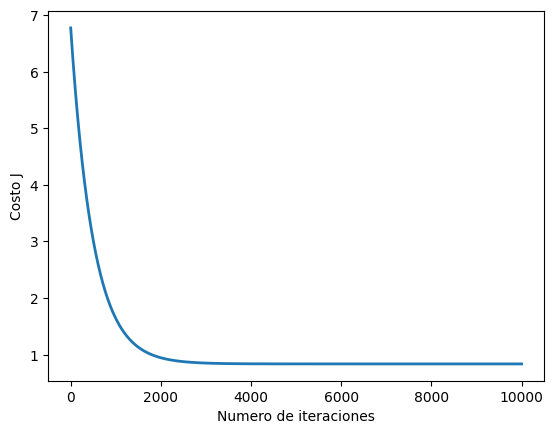

In [79]:
alpha = 0.001
num_iters = 10000


theta = np.zeros(X_train_norm.shape[1])
theta, J_history = gradientDescentMulti(X_train_norm, y_train, theta, alpha, num_iters)


pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')


print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el Stay comfort de una persona de 20 age, con una calificacion de Hotel wifi service de 4
age_example = 20
wifi_service_example = 4


X_array = np.array([1, age_example, wifi_service_example], dtype=np.float64)
X_array[1:3] = (X_array[1:3] - mu) / sigma


predicted_comfort = np.dot(X_array, theta)

print(f'\nEl Stay comfort predecido para una persona de {age_example} años y {wifi_service_example} de calificacion de wifi es: {predicted_comfort:.2f}')


cost_on_test = computeCostMulti(X_test_norm, y_test, theta)
print(f"Costo en el conjunto de prueba: {cost_on_test:.2f}")


# **Ecuacion de la NORMAL**

Cargamos los datos y tambien los valores 1.

In [81]:

df = pd.read_csv('/content/gdrive/MyDrive/Inteligencia Artificial I/Datasets Trabajos/Europe Hotel Booking Satisfaction Score.csv', delimiter=',')

X = df[['Age','Hotel wifi service']]
y = df['Stay comfort']
m = y.size
print(m)
X = np.concatenate([np.ones((m, 1)), X], axis=1)
print(X)

103904
[[ 1. 13.  3.]
 [ 1. 25.  3.]
 [ 1. 26.  2.]
 ...
 [ 1. 30.  1.]
 [ 1. 22.  1.]
 [ 1. 27.  1.]]


In [82]:
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

Calculamos los parametros con la ecuacion de la normal y los mostramos.
Luego realizamos una prediccion.

In [83]:
theta = normalEqn(X, y);

print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

X_array = [1, 40, 3.76]
point = np.dot(X_array, theta)

print('Puntuacion de estadia predecida para una persona de 25 años y una puntacion de wifi de 5 (usando la ecuación de la normal): {:.0f}'.format(point))

Theta calculado a partir de la ecuación de la normal: [2.57097706 0.01380063 0.11904466]
Puntuacion de estadia predecida para una persona de 25 años y una puntacion de wifi de 5 (usando la ecuación de la normal): 4
